In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

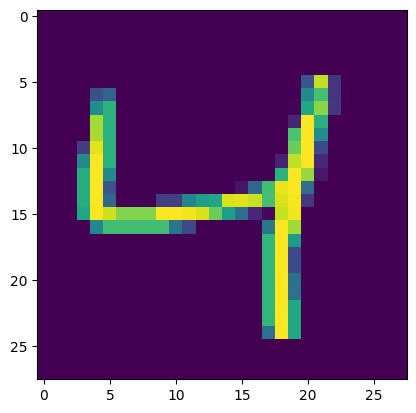

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [10]:
X_train =X_train/255
X_test =X_test/255

In [30]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics =['accuracy'])

In [33]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2944 - accuracy: 0.9158 - val_loss: 0.1522 - val_accuracy: 0.9565
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1229 - accuracy: 0.9630 - val_loss: 0.1135 - val_accuracy: 0.9655
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0833 - accuracy: 0.9745 - val_loss: 0.1120 - val_accuracy: 0.9671
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0638 - accuracy: 0.9806 - val_loss: 0.0998 - val_accuracy: 0.9703
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0505 - accuracy: 0.9840 - val_loss: 0.1091 - val_accuracy: 0.9688
Epoch 6/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.0962 - val_accuracy: 0.9743
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.1033 - val_accuracy:

In [35]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
y_pred = y_prob.argmax(axis=1)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred)

0.9785

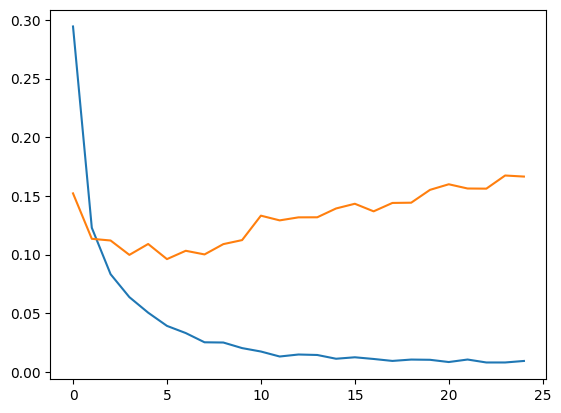

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

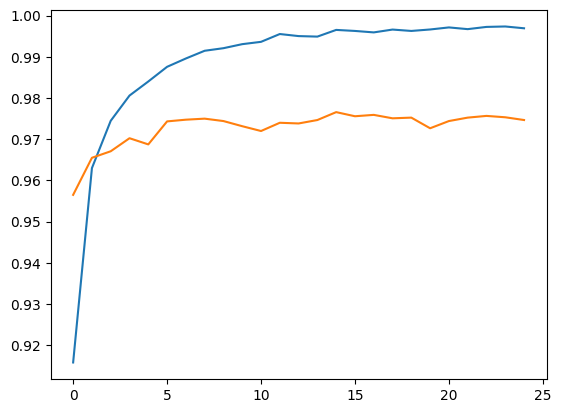

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

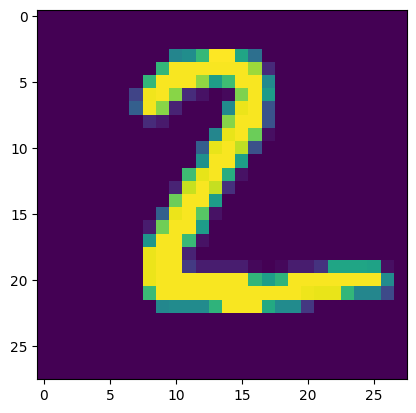

In [47]:
plt.imshow(X_test[1])

In [46]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 59ms/step


array([2])